#  Bank_Personal_Loan_ Prediction - Thera Bank case study

### Data Source
Bank_Personal_Loan_Modelling.xlsx

# Q1. Read the column description and ensure you understand each attribute well.

### Data Dictionary
**ID:** Customer ID							
**Age:** Customer's age in completed years							
**Experience:** #years of professional experience							
**Income:** Annual income of the customer (thousand dollars)							
**ZIPCode:** Home Address ZIP code							
**Family:** Family size of the customer							
**CCAvg:** Avg. spending on credit cards per month (thousand dollars)						
**Education:** Education Level - 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
**Mortgage:** Value of house mortgage if any (thousand dollars)						
**Personal Loan:** Did this customer accept the personal loan offered in the last campaign?							
**Securities Account:** Does the customer have a securities account with the bank?							
**CD Account:** Does the customer have a certificate of deposit (CD) account with the bank?							
**Online:** Does the customer use internet banking facilities?							
**CreditCard:** Does the customer use a credit card issued by UniversalBank?

### Import Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# To calculate accuracy measures and confusion matrix
from sklearn import metrics

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Ensemble method
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
%matplotlib inline

### Data Ingestion

In [9]:
bank_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df = bank_df.copy(deep=True)

In [10]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.rename(columns={'Personal Loan': 'Personal_Loan'}, inplace=True)

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal_Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
print('No. of missing values in each feature of the dataset: ')
print(df.isnull().sum())

No. of missing values in each feature of the dataset: 
ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


# Q2. Study the data distribution in each attribute, share your findings.
# Q3. Get the target column distribution. Your comments.

In [8]:
# Summary statistics of numeric data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


##### Observation:
**'Experience'** variable has negative values and so it needs to be treated.

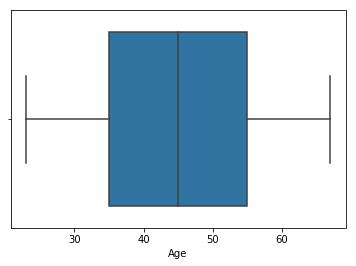

In [9]:
sns.boxplot(x='Age', data=df)

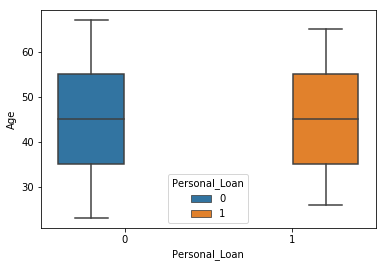

In [10]:
sns.boxplot(x='Personal_Loan', y='Age', hue='Personal_Loan', data=df)

##### Observation:
There are no outliers in 'Age' variable and customers of age ranging from 25 to 65 years had accepted the personal loan offered in the last campaign. But 50% of customers who had accepted personal loan are in the age range of 35 to 55 years.

##### Hypothesis Test: 'Age' variable

H0 : The average age of customers taking personal loan is SAME as the average age of customers not taking personal loan.

H1 : The average age of customers taking personal loan is DIFFERENT from the average age of customers not taking personal loan.

In [11]:
from scipy import stats

stats.ttest_ind(df[df.Personal_Loan == 1]['Age'], df[df.Personal_Loan == 0]['Age'])

Ttest_indResult(statistic=-0.54619066155393226, pvalue=0.58495926370532503)

##### Here p-value>0.05, so we accept null hypothesis: H0 : The average age of customers taking personal loan is SAME as the average age of customers not taking personal loan.

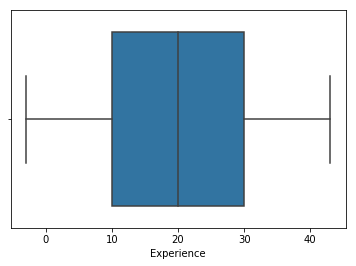

In [12]:
sns.boxplot(x='Experience', data=df)

##### Observation:
**'Experience'** variable has negative values, which need to be treated.

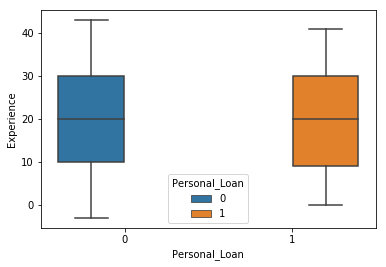

In [13]:
sns.boxplot(x='Personal_Loan', y='Experience', hue='Personal_Loan', data=df)

##### Observation:
Customers with professional experience ranging from 0 to 40 years had accepted the personal loan offered in the last campaign. But 50% of customers who accepted personal loan had 10 to 30 years of professional experience.

##### Hypothesis Test: 'Experience' variable

H0 : The average years of professional experience of customers taking personal loan is SAME as the average years of professional experience of customers not taking personal loan.

H1 : The average years of professional experience of customers taking personal loan is DIFFERENT from the average years of professional experience of customers not taking personal loan.

In [14]:
stats.ttest_ind(df[df.Personal_Loan == 1]['Experience'], df[df.Personal_Loan == 0]['Experience'])

Ttest_indResult(statistic=-0.52409474519954125, pvalue=0.60023588316418897)

##### Here p-value>0.05, so we accept null hypothesis: H0 : The average years of professional experience of customers taking personal loan is SAME as the average years of professional experience of customers not taking personal loan.

<class 'numpy.ndarray'>


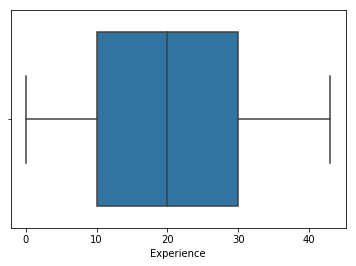

In [15]:
# Treating negative values in 'Experience' variable
exp_array = np.array(df['Experience'])
print(type(exp_array))

exp_array[exp_array < 0] = 0
df['Experience'] = pd.DataFrame(exp_array)

sns.boxplot(x='Experience', data=df)

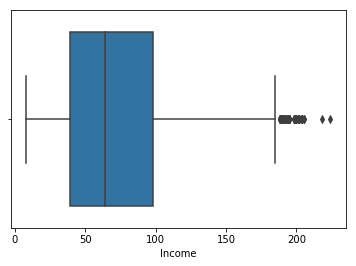

In [16]:
sns.boxplot(x='Income', data=df)

##### Observation:
There are few outliers in **'Income'** variable so it needs to be treated.

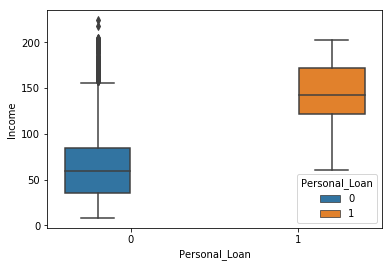

In [17]:
sns.boxplot(x='Personal_Loan', y='Income', hue='Personal_Loan', data=df)

##### Observation:
Customers with income ranging from USD 60k to 200k had accepted the personal loan offered in the last campaign. But 50% of customers who accepted personal loan had income range of USD 120k to 170k.

##### Hypothesis Test: 'Income' variable

H0 : The average income of customers taking personal loan is SAME as the average income of customers not taking personal loan.

H1 : The average income of customers taking personal loan is DIFFERENT from the average income of customers not taking personal loan.


In [18]:
stats.ttest_ind(df[df.Personal_Loan == 1]['Income'], df[df.Personal_Loan == 0]['Income'])

Ttest_indResult(statistic=41.085332912075522, pvalue=0.0)

##### Here p-value<0.05, so we reject null hypothesis and accept alternate hypothesis: H1 : The average income of customers taking personal loan is DIFFERENT from the average income of customers not taking personal loan.

186.5
<class 'numpy.ndarray'>


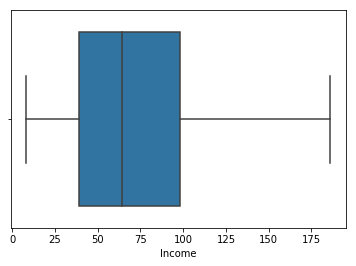

In [19]:
# Outliers treatment in 'Income' variable
q75, q25 = np.percentile(df['Income'], [75 ,25])
iqr = q75 - q25
max_val = q75 + 1.5*iqr
print(max_val)

inc_array = np.array(df['Income'])
print(type(inc_array))

inc_array[inc_array > max_val] = max_val
df['Income'] = pd.DataFrame(inc_array)

sns.boxplot(x='Income', data=df)

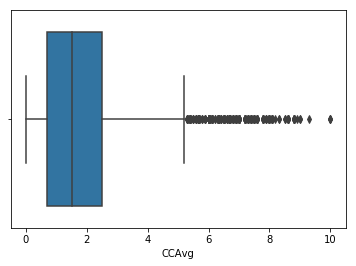

In [20]:
sns.boxplot(x='CCAvg', data=df)

##### Observation:
There are few outliers in **'CCAvg'** variable so it needs to be treated.

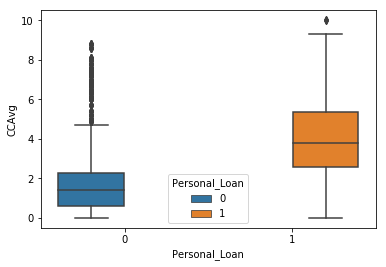

In [21]:
sns.boxplot(x='Personal_Loan', y='CCAvg', hue='Personal_Loan', data=df)

##### Observation:
Customers with average monthly credit card spend of USD 0 to 10k had accepted the personal loan offered in the last campaign.But 50% of customers who accepted personal loan had average monthly credit card spend of USD 2.5K to 5.5K.

##### Hypothesis Test: 'CCAvg' variable

H0 : The average monthly credit card spend of customers taking personal loan is SAME as the average monthly credit card spend of customers not taking personal loan.

H1 : The average monthly credit card spend of customers taking personal loan is DIFFERENT from the average monthly credit card spend of customers not taking personal loan.

In [22]:
stats.ttest_ind(df[df.Personal_Loan == 1]['CCAvg'], df[df.Personal_Loan == 0]['CCAvg'])

Ttest_indResult(statistic=27.882284897899115, pvalue=3.8156836419461841e-159)

##### Here p-value>0.05, so we accept null hypothesis: H0 : The average monthly credit card spend of customers taking personal loan is SAME as the average monthly credit card spend of customers not taking personal loan.

5.2
<class 'numpy.ndarray'>


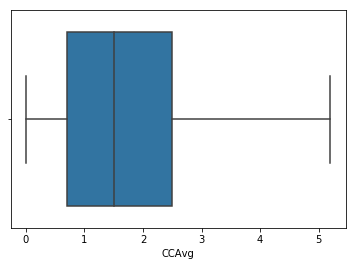

In [23]:
# Outliers treatment in 'CCAvg' variable
q75, q25 = np.percentile(df['CCAvg'], [75 ,25])
iqr = q75 - q25
max_val = q75 + 1.5*iqr
print(max_val)

CCAvg_array = np.array(df['CCAvg'])
print(type(CCAvg_array))

CCAvg_array[CCAvg_array > max_val] = max_val
df['CCAvg'] = pd.DataFrame(CCAvg_array)

sns.boxplot(x='CCAvg', data=df)

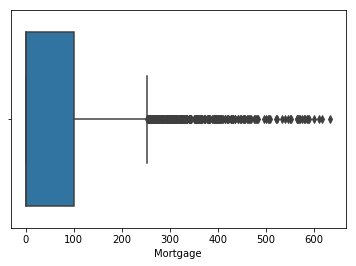

In [24]:
sns.boxplot(x='Mortgage', data=df)

##### Observation:
There are few outliers in **'Mortgage'** variable so it needs to be treated.

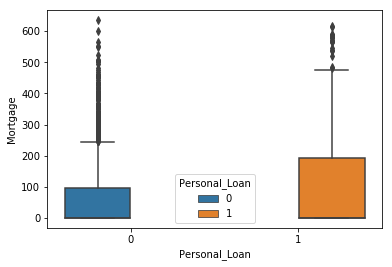

In [25]:
sns.boxplot(x='Personal_Loan', y='Mortgage', hue='Personal_Loan', data=df)

##### Observation:
Customers with mortgage ranging from USD 0 to 650k had accepted the personal loan offered in the last campaign. But 50% of customers who accepted personal loan had mortgage ranging from USD 0 to 200k.

##### Hypothesis Test: 'Mortgage' variable

H0 : The average mortgage of customers taking personal loan is SAME as the average mortgage of customers not taking personal loan.

H1 : The average mortgage of customers taking personal loan is DIFFERENT from the average mortgage of customers not taking personal loan.

In [26]:
stats.ttest_ind(df[df.Personal_Loan == 1]['Mortgage'], df[df.Personal_Loan == 0]['Mortgage'])

Ttest_indResult(statistic=10.148618914431497, pvalue=5.7303417215740101e-24)

##### Here p-value>0.05, so we accept null hypothesis: H0 : The average mortgage of customers taking personal loan is SAME as the average mortgage of customers not taking personal loan.

252.5
<class 'numpy.ndarray'>


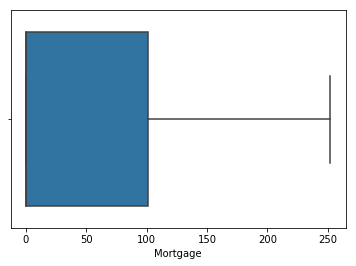

In [27]:
# Outliers treatment in 'Mortgage' variable
q75, q25 = np.percentile(df['Mortgage'], [75 ,25])
iqr = q75 - q25
max_val = q75 + 1.5*iqr
print(max_val)

mort_array = np.array(df['Mortgage'])
print(type(mort_array))

mort_array[mort_array > max_val] = max_val
df['Mortgage'] = pd.DataFrame(mort_array)

sns.boxplot(x='Mortgage', data=df)

In [29]:
# Understanding categorical variables
personal_loan = np.array(df['Personal_Loan'])
family = np.array(df['Family'])
education = np.array(df['Education'])
sec_acc = np.array(df['Securities Account'])
cd_acc = np.array(df['CD Account'])
online = np.array(df['Online'])
credit_card = np.array(df['CreditCard'])

In [30]:
pd.crosstab(personal_loan, family, rownames=['Personal_Loan'], colnames=['Family size']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Family size,1,2,3,4
Personal_Loan,,,,
0,92.73,91.82,86.83,89.03
1,7.27,8.18,13.17,10.97


##### Observation: 
1. **7.27%** of customers with **Family size = 1** had accepted the personal loan offered in the previous campaign.
2. **8.18%** of customers with **Family size = 2** had accepted the personal loan offered in the previous campaign.
3. **13.17%** of customers with **Family size = 3** had accepted the personal loan offered in the previous campaign.
4. **10.97%** of customers with **Family size = 4** had accepted the personal loan offered in the previous campaign.

In [31]:
pd.crosstab(personal_loan, education, rownames=['Personal_Loan'], colnames=['Education level']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Education level,1,2,3
Personal_Loan,,,
0,95.56,87.03,86.34
1,4.44,12.97,13.66


##### Observation: 
1. **4.44%** of customers with **Education level = 1 (Undergrad)** had accepted the personal loan offered in the previous campaign.
2. **12.97%** of customers with **Education level = 2 (Graduate)** had accepted the personal loan offered in the previous campaign.
3. **13.66%** of customers with **Education level = 3 (Advanced/Professional)** had accepted the personal loan offered in the previous campaign.

In [32]:
pd.crosstab(personal_loan, sec_acc, rownames=['Personal_Loan'], colnames=['Securities Account']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Securities Account,0,1
Personal_Loan,,
0,90.62,88.51
1,9.38,11.49


##### Observation: 
1. **9.38%** of customers **NOT HAVING** securities account with the bank had accepted the personal loan offered in the previous campaign.
2. **11.49%** of customers **HAVING** securities account with the bank had accepted the personal loan offered in the previous campaign.

In [33]:
pd.crosstab(personal_loan, cd_acc, rownames=['Personal_Loan'], colnames=['CD Account']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

CD Account,0,1
Personal_Loan,,
0,92.76,53.64
1,7.24,46.36


##### Observation: 
1. **7.24%** of customers **NOT HAVING** a certificate of deposit (CD) account with the bank had accepted the personal loan offered in the previous campaign.
2. **46.36%** of customers **HAVING** a certificate of deposit (CD) account with the bank had accepted the personal loan offered in the previous campaign.

In [34]:
pd.crosstab(personal_loan, online, rownames=['Personal_Loan'], colnames=['Online']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Online,0,1
Personal_Loan,,
0,90.62,90.25
1,9.38,9.75


##### Observation: 
1. **9.38%** of customers **NOT doing online transactions** had accepted the personal loan offered in the previous campaign.
2. **9.75%** of customers **doing online transactions** had accepted the personal loan offered in the previous campaign.

In [35]:
pd.crosstab(personal_loan, credit_card, rownames=['Personal_Loan'], colnames=['Credit Card']).apply(lambda col: round((col/col.sum())*100, 2), axis=0)

Credit Card,0,1
Personal_Loan,,
0,90.45,90.27
1,9.55,9.73


##### Observation: 
1. **9.55%** of customers **NOT using a credit card issued by UniversalBank** had accepted the personal loan offered in the previous campaign.
2. **9.73%** of customers **using a credit card issued by UniversalBank** had accepted the personal loan offered in the previous campaign.

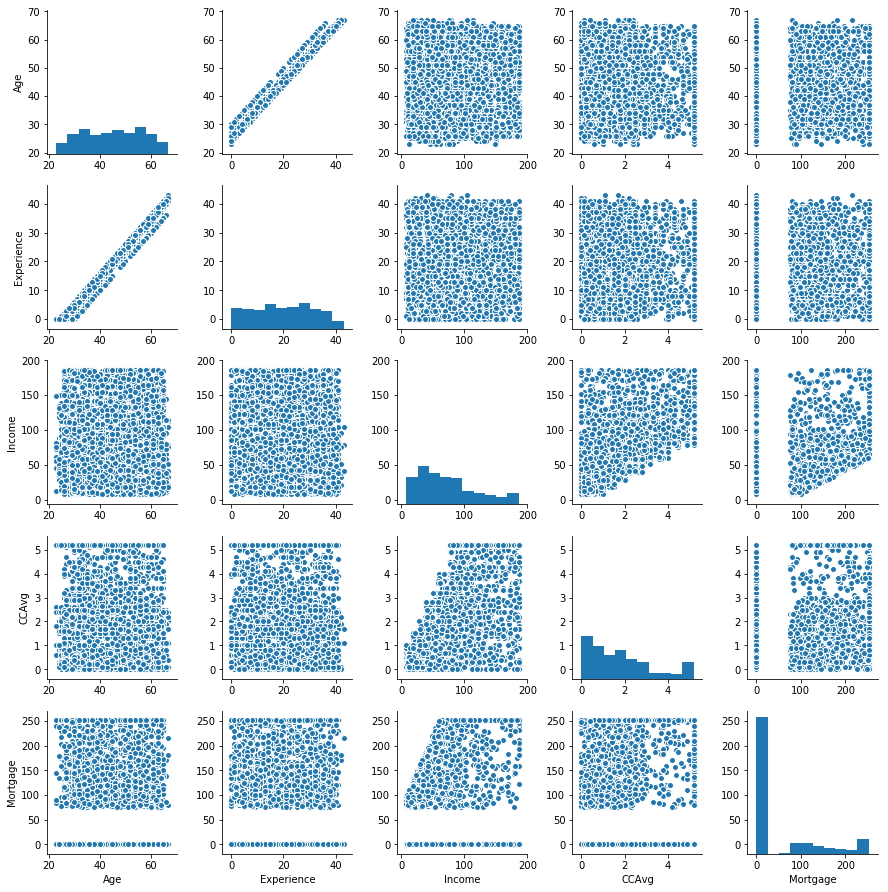

In [36]:
# Pair-plots of continuous variables
sns.pairplot(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])

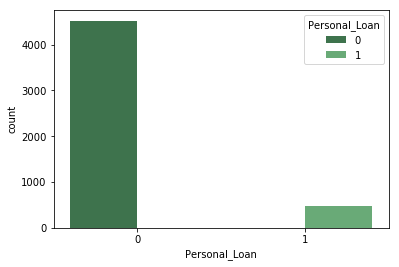

In [37]:
sns.countplot(x='Personal_Loan', data=df, palette="Greens_d", hue='Personal_Loan')

In [38]:
pd.value_counts(df['Personal_Loan'].values, sort=False)

0    4520
1     480
dtype: int64

**Only (480/5000) = 9.6% of customers accepted the personal loan offered in the last campaign.**

In [39]:
# Standardise data 
df.apply(lambda x: (x-np.mean(x))/(np.std(x)))
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [40]:
Y_labels = ['0', '1']

Text(0.5,1,'Correlation between different features of dataset\n')

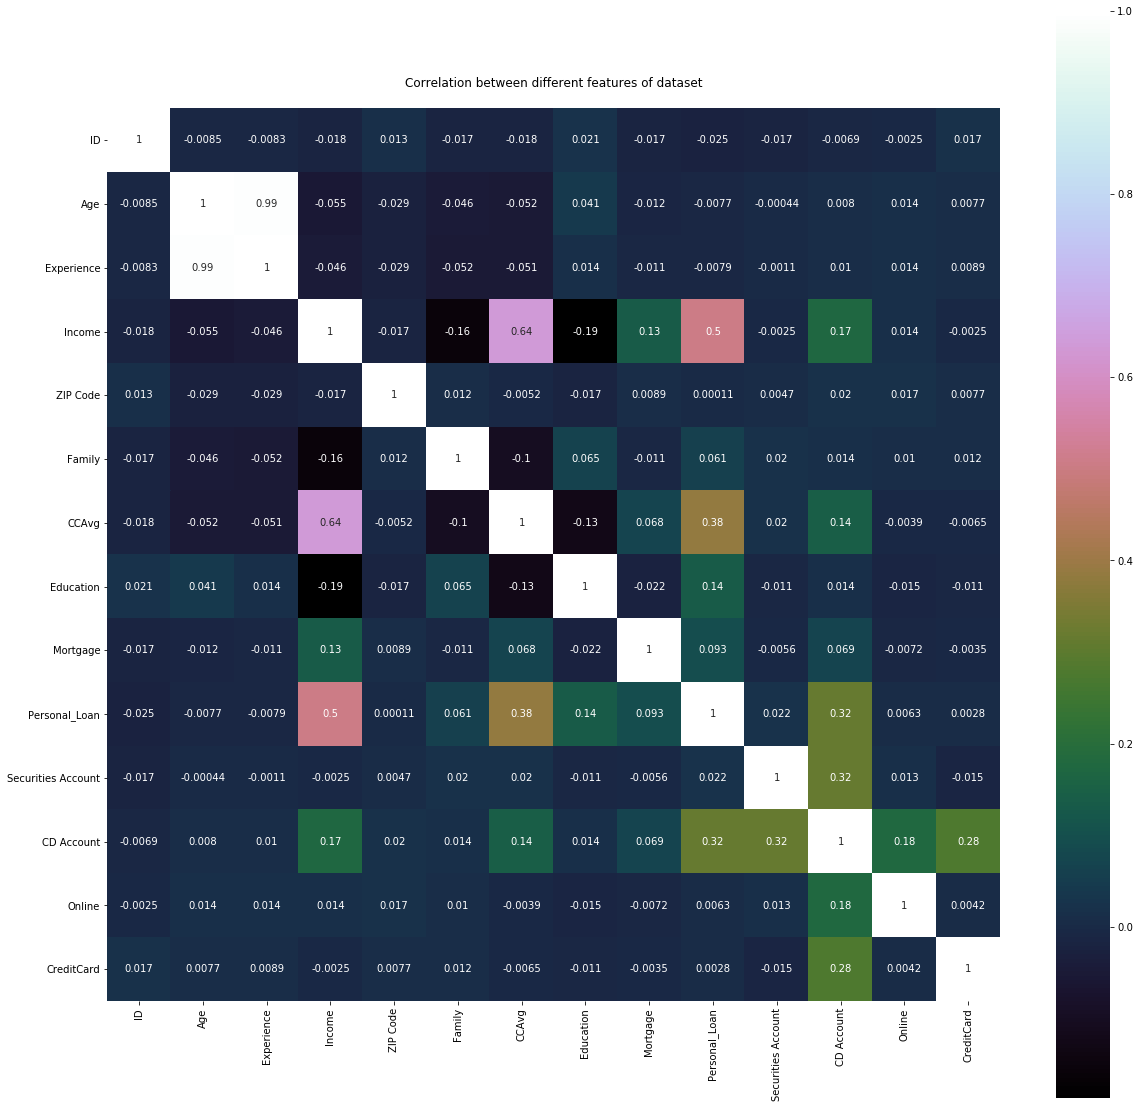

In [41]:
#Correlation matrix
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different features of dataset\n')

##### Observation:
1. **Age** and **Experience** have very strong positive correlation of 0.99 (In order to avoid the impact of mult-collinearity, you can use either 'Age' or 'Experience' variable in Logistic regression model as both are highly correlated).
2. **Income** and **CCAvg** have very strong positive correlation of 0.64
3. **Income** and **Personal Loan** have positive correlation of 0.50
4. **CCAvg** and **Personal Loan** have positive correlation of 0.38

# Q4. Split the data into training and test set in the ratio of 70:30 respectively.

### Splitting data into Train and Test set

In [42]:
# Splitting 70% of the records from the dataset for training and 30% for testing 
from sklearn.model_selection import train_test_split
Y = df['Personal_Loan']
X = df.drop(['ID', 'ZIP Code', 'Personal_Loan'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=5)

# Q5. Use a classification model to predict the likelihood of a liability customer buying personal loans.

##### Feature Selection for Logistic Regression

In [43]:
from sklearn.feature_selection import SelectPercentile

# 70% of the features/predictors are being selected in the model 
# which are considered as the important predictors of the target variable('Personal Loan')

select = SelectPercentile(percentile=70)
select.fit(X_train, Y_train)
X_train_trans = select.transform(X_train)
X_test_trans = select.transform(X_test)

print('X_train_trans.shape ', X_train_trans.shape)
print('X_train_trans.shape ', X_train_trans.shape)

mask = select.get_support()
print(mask)
print()
print('\nSelected features from the dataset for Logistic Regression model are below:\n')
print(X_train.columns[mask])

X_train_trans.shape  (3500, 7)
X_train_trans.shape  (3500, 7)
[False False  True  True  True  True  True  True  True False False]


Selected features from the dataset for Logistic Regression model are below:

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account'],
      dtype='object')



Logistic Regression model score =  0.945333333333

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 0]
 [0 0]
 [0 0]]


[Text(0,0.5,'0'), Text(0,1.5,'1')]

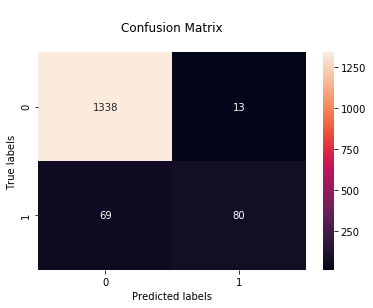

In [44]:
logit_model = LogisticRegression()
logit_model.fit(X_train_trans, Y_train)
accuracy1 = logit_model.score(X_test_trans, Y_test)
Y_predicted1 = logit_model.predict(X_test_trans)
print('\nLogistic Regression model score = ', accuracy1)
print('\nTest labels, Predicted labels')
y_grid1 = (np.column_stack([Y_test, Y_predicted1]))
print(y_grid1)

cm = metrics.confusion_matrix(Y_test, Y_predicted1)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Gaussian Navie Bayes Model accuracy =  0.889333333333

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 0]
 [0 0]
 [0 0]]


[Text(0,0.5,'0'), Text(0,1.5,'1')]

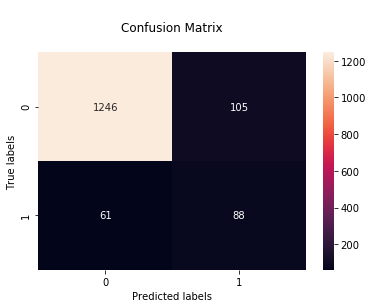

In [46]:
# Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, Y_train)
accuracy2 = gnb_clf.score(X_test, Y_test)
Y_predicted2 = gnb_clf.predict(X_test)
print('\nGaussian Navie Bayes Model accuracy = ', accuracy2)
print('\nTest labels, Predicted labels')
y_grid2 = (np.column_stack([Y_test, Y_predicted2]))
print(y_grid2)

cm = metrics.confusion_matrix(Y_test, Y_predicted2)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


KNN Model accuracy =  0.907333333333

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 1]
 [0 0]
 [0 0]]


[Text(0,0.5,'0'), Text(0,1.5,'1')]

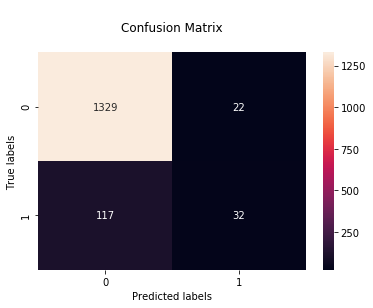

In [47]:
# K-Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
knn_clf.fit(X_train, Y_train)
accuracy3 = knn_clf.score(X_test, Y_test)
Y_predicted3 = knn_clf.predict(X_test)
print('\nKNN Model accuracy = ', accuracy3)
print('\nTest labels, Predicted labels')
y_grid3 = (np.column_stack([Y_test, Y_predicted3]))
print(y_grid3)


cm = metrics.confusion_matrix(Y_test, Y_predicted3)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Score of the KNN model will be highest when n_neighbors =  35


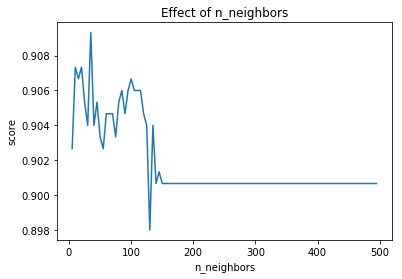

In [48]:
knn_clf = KNeighborsClassifier(n_jobs=-1, metric = 'euclidean')
k_neighbors = np.arange(5, 500, 5)
scores = []

for n in k_neighbors:
    knn_clf.set_params(n_neighbors=n)
    knn_clf.fit(X_train, Y_train)
    scores.append(knn_clf.score(X_test, Y_test))   
    
i=0
for score in scores:
    if score==max(scores):
        print('\nScore of the KNN model will be highest when n_neighbors = ', k_neighbors.tolist()[i])       
    i=i+1

plt.title('Effect of n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.plot(k_neighbors, scores)
plt.show()


KNN Model accuracy =  0.909333333333

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 1]
 [0 0]
 [0 0]]


[Text(0,0.5,'0'), Text(0,1.5,'1')]

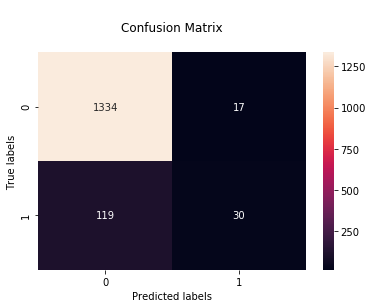

In [49]:
knn_clf = KNeighborsClassifier(n_neighbors = 35, metric='euclidean')
knn_clf.fit(X_train, Y_train)
accuracy4 = knn_clf.score(X_test, Y_test)
Y_predicted4 = knn_clf.predict(X_test)
print('\nKNN Model accuracy = ', accuracy4)
print('\nTest labels, Predicted labels')
y_grid4 = (np.column_stack([Y_test, Y_predicted4]))
print(y_grid4)


cm = metrics.confusion_matrix(Y_test, Y_predicted4)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


SVM (Classifier) Model accuracy  =  0.904666666667

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 0]
 [0 0]
 [0 0]]


[Text(0,0.5,'0'), Text(0,1.5,'1')]

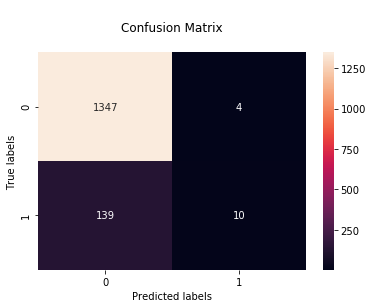

In [52]:
# Support Vector Machine for Classification

from sklearn import metrics
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, Y_train)
accuracy5 = svm_clf.score(X_test, Y_test)
Y_predicted5 = svm_clf.predict(X_test)

print('\nSVM (Classifier) Model accuracy  = ', accuracy5)
print('\nTest labels, Predicted labels')
y_grid5 = (np.column_stack([Y_test, Y_predicted5]))
print(y_grid5)


cm = metrics.confusion_matrix(Y_test, Y_predicted5)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Decision Tree Model accuracy =  0.981333333333

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 1]
 [0 0]
 [0 0]]


[Text(0,0.5,'0'), Text(0,1.5,'1')]

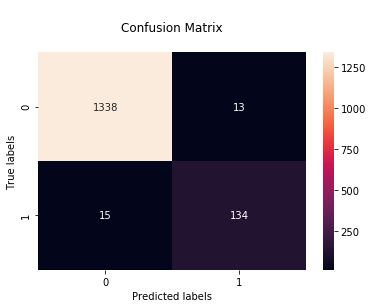

In [53]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(criterion = 'entropy')
dt_clf.fit(X_train, Y_train)
accuracy6 = dt_clf.score(X_test , Y_test)
Y_predicted6 = dt_clf.predict(X_test)
print('\nDecision Tree Model accuracy = ', accuracy6)
print('\nTest labels, Predicted labels')
y_grid6 = (np.column_stack([Y_test, Y_predicted6]))
print(y_grid6)


cm = metrics.confusion_matrix(Y_test, Y_predicted6)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Score of the Decision Tree model will be highest when max_depth =  5


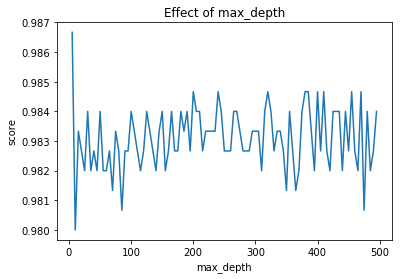

In [54]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy')
max_depth_est = np.arange(5, 500, 5)
scores = []

for n in max_depth_est:
    dt_clf.set_params(max_depth=n)
    dt_clf.fit(X_train, Y_train)
    scores.append(dt_clf.score(X_test, Y_test))   
    
i=0
for score in scores:
    if score==max(scores):
        print('\nScore of the Decision Tree model will be highest when max_depth = ', max_depth_est.tolist()[i])
    i=i+1

plt.title('Effect of max_depth')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.plot(max_depth_est, scores)
plt.show()


Decision Tree Model accuracy =  0.986666666667

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 1]
 [0 0]
 [0 0]]


[Text(0,0.5,'0'), Text(0,1.5,'1')]

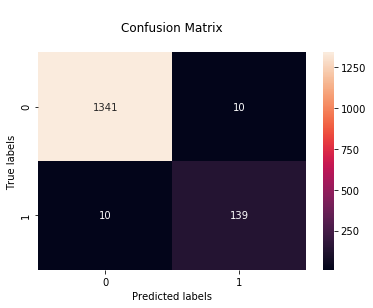

In [55]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt_clf.fit(X_train, Y_train)
accuracy7 = dt_clf.score(X_test , Y_test)
Y_predicted7 = dt_clf.predict(X_test)
print('\nDecision Tree Model accuracy = ', accuracy7)
print('\nTest labels, Predicted labels')
y_grid7 = (np.column_stack([Y_test, Y_predicted7]))
print(y_grid7)


cm = metrics.confusion_matrix(Y_test, Y_predicted7)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

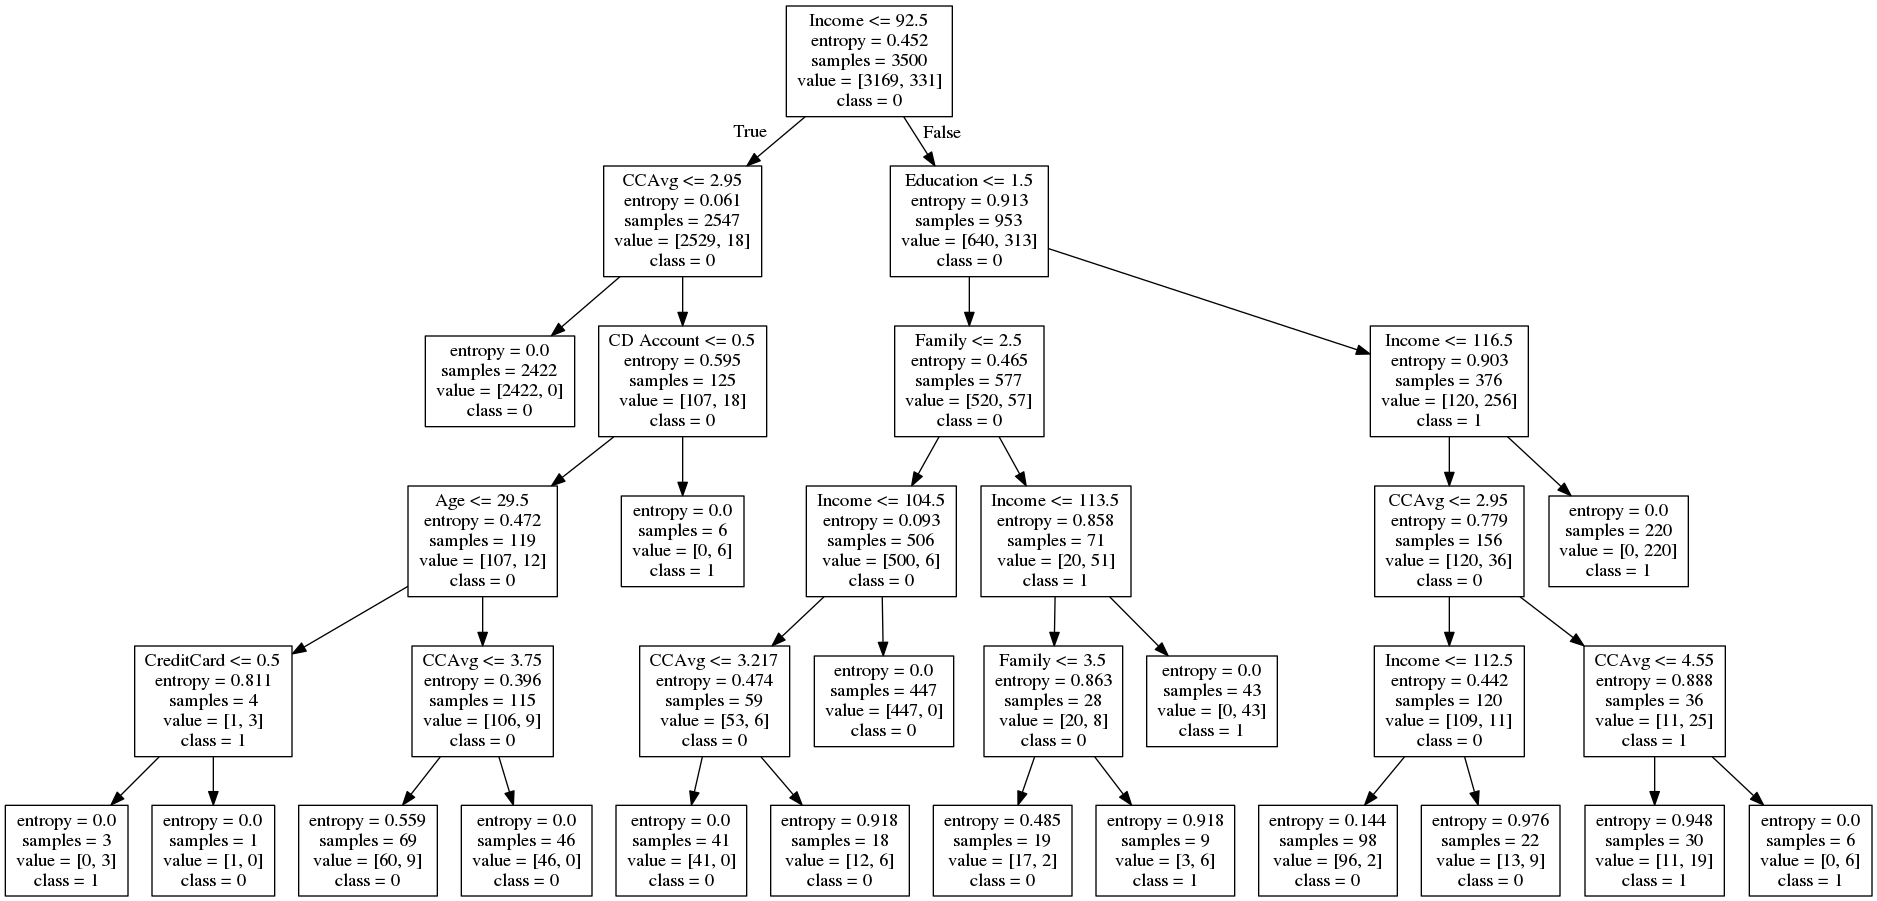

In [56]:
from IPython.display import Image  
import pydotplus as pydot
from sklearn import tree
dot_data = tree.export_graphviz(dt_clf, out_file=None, feature_names = list(X_train), class_names = list(Y_labels))
graph = pydot.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Q6. Explain why you chose one model over the other (do not use ensemble techniques yet).

**Logistic Regression**

Advantages: 
1. Makes no assumptions about distributions of classes in feature space 
2. Easily extended to multiple classes (multinomial regression) 
3. Natural probabilistic view of class predictions 
4. Quick to train 
5. Very fast at classifying unknown records 
6. Good accuracy for many simple data sets 
7. Resistant to overfitting 
8. Can interpret model coefficients as indicators of feature importance

Disadvantages: 
1. Constructs linear boundaries



**Naive Bayes Classifier**

Advantages:
1. Simple, fast in processing and effective 
2. Does well with noisy data and missing data 
3. Requires few examples for training  (assuming the data set is a true representative of the population) 
4. Easy to obtain estimated probability for a prediction

Disadvantages: 
1. Relies on and often incorrect assumption of independent features 
2. Not ideal for data sets with large number of numerical attributes 
3. Estimated probabilities are less reliable in practice than predicted classes 
4. If rare predictor value is not captured in the training set but appears in the test set the probability calculation will be incorrect



**K-Nearest Neighbors Classifer**

Advantages: 
1. Makes no assumptions about distributions of classes in feature space 
2. Can work for multi classes simultaneously 
3. Easy to implement and understand 
4. Not impacted by outliers

Disadvantages: 
1. Fixing the optimal value of K is a challenge 
2. Will not be effective when the class distributions overlap 
3. Does not output any models. Calculates distances for every new point (lazy learner) 
4. Computationally intensive (O(D(N^2))), can be addressed using KD algorithms which take time to prepare



**SVM Classifier**

Advantages:
1. Accuracy
2. Works well on smaller cleaner datasets
3. It can be more efficient because it uses a subset of training points

Disadvatages:
1. It is not suited to larger datasets as the training time with SVMs can be high
2. Less effective on noisier datasets with overlapping classes



**Decision Tree Classifier**

Advantages:
1. Simple, fast in processing and effective 
2. Does well with noisy data and missing data 
3. Handles numeric and categorical variables 
4. Interpretation of results does not required mathematical or statistical knowledge

Disadvantages:
1. Often biased towards splits or features have large number of levels 
2. May not be optimum as modelling some relations on axis parallel basis is not optimal 
3. Small changes in training data can result in large changes to the logic 
4. Large trees can be difficult to interpret 

# Q7. Use ensemble techniques to improve the performance.

### Ensemble methods
To combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator. Two families of ensemble methods are usually distinguished:
1. **Boosting methods** based estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. 
**Ex: AdaBoost**
2. **Averaging(Bagging) methods**: the driving principle is to build several estimators independently and then to average / vote  their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. 
**Ex: Random Forest**


AdaBoost Model accuracy =  0.972666666667

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 1]
 [0 0]
 [0 0]]


[Text(0,0.5,'0'), Text(0,1.5,'1')]

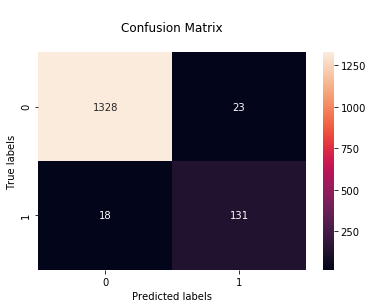

In [57]:
#Boosting Algorithm: AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

dt = DecisionTreeClassifier() 
AdaBoost_clf = AdaBoostClassifier(base_estimator=dt)# decision tree is used as a base estimator
AdaBoost_clf.fit(X_train,Y_train)
accuracy8 = AdaBoost_clf.score(X_test, Y_test)
Y_predicted8 = AdaBoost_clf.predict(X_test)
print('\nAdaBoost Model accuracy = ', accuracy8)
print('\nTest labels, Predicted labels')
y_grid8 = (np.column_stack([Y_test, Y_predicted8]))
print(y_grid8)


cm = metrics.confusion_matrix(Y_test, Y_predicted8)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])    

In [58]:
#Cross-validation of AdaBoost model

kfold = model_selection.KFold(n_splits=10, random_state=7)
AdaBoost_clf = AdaBoostClassifier(random_state=7)
accuracy8 = model_selection.cross_val_score(AdaBoost_clf, X, Y, cv=kfold)
print('\nCross-validation: AdaBoost model accuracy = ', accuracy8.mean())


Cross-validation: AdaBoost model accuracy =  0.9668



Random Forest Model accuracy =  0.982

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 1]
 [0 0]
 [0 0]]


[Text(0,0.5,'0'), Text(0,1.5,'1')]

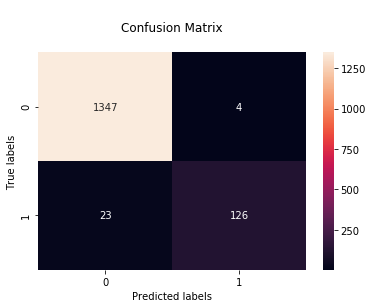

In [59]:
#Bagging Algorithm: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion = 'gini')
rf_clf = rf_clf.fit(X_train, Y_train)
accuracy9 = rf_clf.score(X_test, Y_test)
Y_predicted9 = rf_clf.predict(X_test)
print('\nRandom Forest Model accuracy = ', accuracy9)
print('\nTest labels, Predicted labels')
y_grid9 = (np.column_stack([Y_test, Y_predicted9]))
print(y_grid9)


cm = metrics.confusion_matrix(Y_test, Y_predicted9)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Score of the Random Forest model will be highest when n_estimators(no. of trees) =  185

Score of the Random Forest model will be highest when n_estimators(no. of trees) =  395


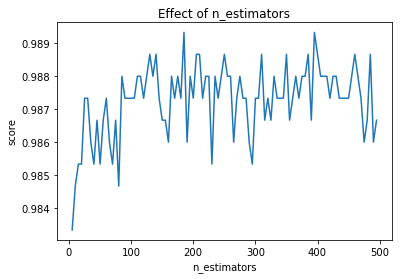

In [60]:
rf_clf = RandomForestClassifier(criterion = 'gini')
estimators = np.arange(5, 500, 5)
scores = []

for n in estimators:
    rf_clf.set_params(n_estimators=n)
    rf_clf.fit(X_train, Y_train)
    scores.append(rf_clf.score(X_test, Y_test))   
    
i=0
for score in scores:
    if score==max(scores):
        print('\nScore of the Random Forest model will be highest when n_estimators(no. of trees) = ', estimators.tolist()[i])
    i=i+1

plt.title('Effect of n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.plot(estimators, scores)
plt.show()


Random Forest Model accuracy =  0.987333333333

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ..., 
 [1 1]
 [0 0]
 [0 0]]


[Text(0,0.5,'0'), Text(0,1.5,'1')]

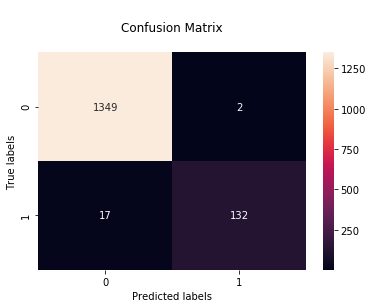

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion = 'gini', n_estimators=185)
rf_clf = rf_clf.fit(X_train, Y_train)
accuracy10 = rf_clf.score(X_test, Y_test)
Y_predicted10 = rf_clf.predict(X_test)
print('\nRandom Forest Model accuracy = ', accuracy10)
print('\nTest labels, Predicted labels')
y_grid10 = (np.column_stack([Y_test, Y_predicted10]))
print(y_grid10)


cm = metrics.confusion_matrix(Y_test, Y_predicted10)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

##### Feature Importance from Random Forest Model (this model has the highest accuracy of 98.73%)

In [62]:
indices = np.argsort(rf_clf.feature_importances_)[::-1]

In [63]:
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         rf_clf.feature_importances_[indices[f]]]

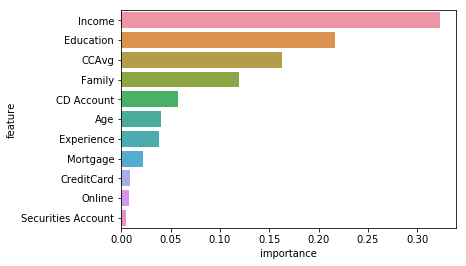

In [64]:
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

##### Note:

As per the model, the most important features which influence the customer in taking personal loan are listed below:

1. Income
2. Education level
3. CCAvg (Avg. spending on credit cards per month (thousand dollars))
4. Family size
5. CD Account (having certificate of deposit (CD) account or not)
6. Age
7. Mortgage